## Final Project Submission

Please fill out:
* Student name: Benjamin Toler
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Microsoft Movie Analysis
<img src="./images/Microsoft_image.jpg" alt="Drawing" style="width: 900px;height:300px;float: left;"/>

# Overview
This project uses exploratory data analysis to produce insights about the movie industry. Analysis of a movie datasets from IMDb and The Numbers shows that the most profitable movies are those that use large production budgets, are of the animation, sci-fi, or Adventure genres, and are released during the summer or holiday months. These insights can be used by Microsoft to guide the decision making in their new movie studio.

# Business Problem
Microsoft is planning on starting their own movie studio, but they are lacking industry knowledge. Analysis of the movie elements that lead to success at the box office could help Microsoft's new studio make decisions about the types of movie they want to produce.

# Data Understanding
The data provided for this project is sourced from IMDb and The Numbers. I start by importing the data and previewing it to decide which datasets will be useful.

In [16]:
#import pandas
import pandas as pd

In [33]:
#import data with pandas
bom_movies = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_names = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_titles = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_titles_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
rt_movies = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', 
                  encoding= 'unicode_escape')
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
the_numbers = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
dfs = [bom_movies, imdb_names, imdb_titles, imdb_titles_basics,
       imdb_crew, imdb_principals, imdb_ratings, rt_movies, 
       rt_reviews, tmdb, the_numbers]

In [34]:
#preview datasets
for index in range(len(dfs)):
    print("df",index+1)
    display(dfs[index].head(2))

df 1


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


df 2


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


df 3


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0


df 4


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


df 5


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


df 6


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN


df 7


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


df 8


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


df 9


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


df 10


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


df 11


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


After previewing this data, I have decided to move forward using imdb_itles, imdb_titles_basics, imdb_ratings, and tn_budgets datasets.

## IMDb Datasets
The IMDb datasets contain unique IDs for each movie, and include information such as region, genres, and average ratings

In [35]:
imdb_titles.head(5)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [36]:
imdb_titles.region.value_counts()

US      51490
XWW     18467
RU      13817
DE      11634
FR      10990
        ...  
SB          1
VC          1
MQ          1
BUMM        1
CF          1
Name: region, Length: 213, dtype: int64

In [37]:
imdb_titles_basics.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [38]:
imdb_titles_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [39]:
imdb_ratings.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [40]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


## The Numbers Dataset
The Numbers dataset provides information on movie finances and release dates.

In [41]:
the_numbers.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [42]:
the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Data Preparation

## Data Cleaning

For each dataset I drop unecessary columns and rows, and I manipulate the data to usable forms

In [43]:
#select only US films
imdb_titles = imdb_titles[imdb_titles.region == 'US']

#drop duplicate rows
imdb_titles.drop_duplicates('title_id', inplace=True)

#drop unecessary columns
imdb_titles.drop(['ordering', 'title', 'language', 'types', 'attributes', 
                  'is_original_title'], axis=1, inplace=True)


<ipython-input-43-890cd2c96c3d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_titles.drop_duplicates('title_id', inplace=True)
C:\Users\bento\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
imdb_titles.shape

(47433, 2)

In [45]:
# #drop unecessary columns
imdb_titles_basics.drop(['original_title', 'runtime_minutes'], axis=1, inplace=True)

#rename columns
imdb_titles_basics.rename(columns={'primary_title': 'movie'}, 
                          inplace=True)

#drop row where genre is NaN
imdb_titles_basics.dropna(subset=['genres'], inplace=True)

#convert string of genres into list of strings
imdb_titles_basics['genres'] = imdb_titles_basics.genres.map(lambda x: x.split(","))

In [46]:
#drop unecessary columns
imdb_ratings.drop('numvotes', axis=1, inplace=True)

In [47]:
#convert budget and gross columsn from strings to floats
the_numbers['domestic_gross'] = the_numbers.domestic_gross.map(lambda x: 
                                    float(x.replace('$','').replace(',','')))
the_numbers['production_budget'] = the_numbers.production_budget.map(lambda x: 
                                    float(x.replace('$','').replace(',','')))
the_numbers['worldwide_gross'] = the_numbers.worldwide_gross.map(lambda x: 
                                    float(x.replace('$','').replace(',','')))

#seperate release date into year and month
the_numbers['start_year'] = the_numbers.release_date.map(lambda x: int(x[-4:]))
the_numbers['start_month'] = the_numbers.release_date.map(lambda x: x[:3])

#drop unecessary columns
the_numbers.drop(['id', 'release_date'], axis=1, inplace=True)

## Merge Data
I start by merging imdb dataset through their common identifiers title_id/tconst

In [48]:
#reset the imdb_title_baiscs and imdb_ratings index to tconst
imdb_titles_basics.set_index('tconst', inplace=True)
imdb_ratings.set_index('tconst', inplace=True)

In [49]:
imdb_titles_and_basics = imdb_titles.join(imdb_titles_basics, how='inner', 
                                          on='title_id')

In [50]:
imdb_titles_and_basics.shape

(46840, 5)

In [51]:
imdb_combined = imdb_titles_and_basics.join(imdb_ratings, how='left',
                                           on='title_id')

In [54]:
imdb_combined.head()

,title_id,region,movie,start_year,genres,averagerating
12,tt0369610,US,Jurassic World,2015,"[Action, Adventure, Sci-Fi]",7.0
50,tt0401729,US,John Carter,2012,"[Action, Adventure, Sci-Fi]",6.6
109,tt1014759,US,Alice in Wonderland,2010,"[Adventure, Family, Fantasy]",6.5
152,tt10379338,US,Random Night Out,2019,[Comedy],NaN
157,tt10446418,US,Icon,2011,"[Documentary, History]",NaN


Now I merge the combined imdb dataset with the tn_budgets. Since these dataset dont have a common identifier, I will merge them using the movie title and release year.

In [55]:
movie_df = imdb_combined.merge(the_numbers, how='inner', 
                               left_on= ['movie', 'start_year'],
                              right_on= ['movie', 'start_year'])

In [56]:
movie_df.movie.value_counts()

Redemption                            3
Heist                                 2
Cyrus                                 2
Treachery                             2
Alice in Wonderland                   2
                                     ..
Shooting the Warwicks                 1
Before Midnight                       1
Batman v Superman: Dawn of Justice    1
Vice                                  1
J. Edgar                              1
Name: movie, Length: 1323, dtype: int64

Some of the movie in our datsets have the same movie title and year depstie being differnet movies. Because we are joing the tn_budgets dataset with the imbd through movie title and year, any movie/year that has multiple occurences will be given the same value from the tn_budgets dataset. Since there is now way of telling which occurence matches the tn_budgets occurence, we will eliminate any movie/year combos that have duplicates.

In [57]:
movie_df.drop_duplicates(subset='movie', keep=False, inplace=True)

In [58]:
movie_df.shape

(1307, 10)

## Featrure Engineering
Using the production budget and gross profit columns, I create two new columns for worldwide net profit and return on investment (ROI)

In [59]:
#add column for worldwide net profit
movie_df['worldwide_net'] = (movie_df.worldwide_gross 
                             - movie_df.production_budget)

#add column for return on investment in perecentage
movie_df['ROI'] = (movie_df.worldwide_net 
                   / movie_df.production_budget) *100

# Analysis

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

## Genre
Animation, sci-fi, and adventure genres produce the greatest average gross and net profit, however mystery and horror movies provide the best average return on investment.

In [62]:
genres_movie_df = movie_df.explode('genres')

In [63]:
genres_grouped = genres_movie_df.groupby('genres').mean().sort_values(
    by='worldwide_net', ascending=True)

In [64]:
genres_grouped[['worldwide_gross', 'worldwide_net']].head()

,worldwide_gross,worldwide_net
genres,,
Documentary,1.392979e+07,1.036373e+07
Sport,5.240023e+07,2.818263e+07
War,6.426969e+07,3.490302e+07
Romance,7.407162e+07,5.162622e+07
Western,1.149991e+08,5.226911e+07


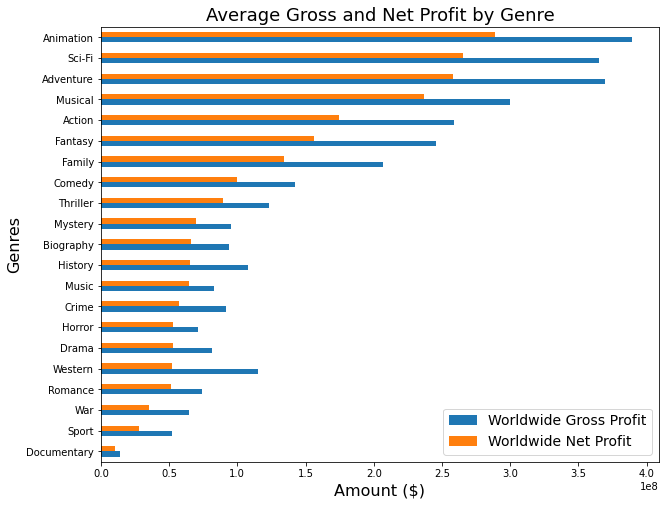

In [67]:
ax = genres_grouped.plot(kind='barh', y=['worldwide_gross','worldwide_net'], 
                        figsize=(10,8));
ax.set_title('Average Gross and Net Profit by Genre', fontsize=18);
ax.legend(['Worldwide Gross Profit', 'Worldwide Net Profit'], loc=4, fontsize=14);
ax.set_ylabel('Genres', fontsize=16);
ax.set_xlabel('Amount ($)', fontsize=16);

In [72]:
genres_grouped.sort_values(by='ROI', ascending=True, inplace=True)

In [73]:
genres_grouped['ROI'].head()

genres
War         53.843673
Western     66.087931
Sport       98.753000
Crime      133.234340
Musical    151.460664
Name: ROI, dtype: float64

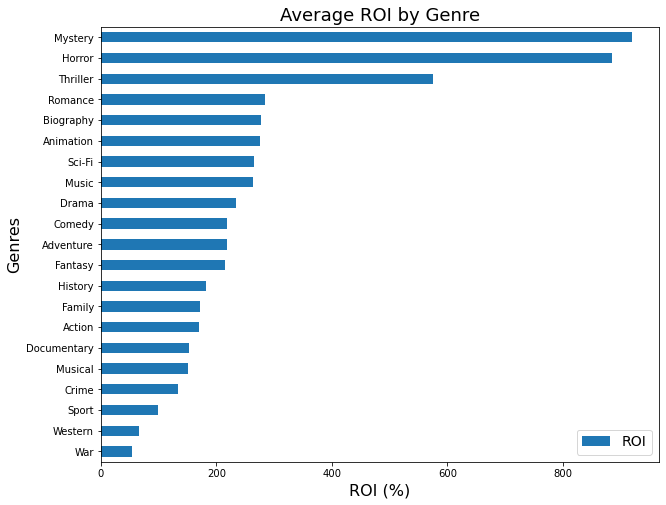

In [75]:
ax = genres_grouped.plot(kind='barh', y='ROI', 
                        figsize=(10,8));
ax.set_title('Average ROI by Genre', fontsize=18);
ax.legend(['ROI'], loc=4, fontsize=14);
ax.set_ylabel('Genres', fontsize=16);
ax.set_xlabel('ROI (%)', fontsize=16);

## Release Month
The summer months of May, June, and July see the highest profits for movies. There also a significant spike in movie profits at the beginning of the holiday season in November

In [84]:
month_grouped = movie_df.groupby('start_month').mean()

In [85]:
month_grouped

,start_year,averagerating,production_budget,domestic_gross,worldwide_gross,worldwide_net,ROI
start_month,,,,,,,
Apr,2013.721519,6.255128,4.537595e+07,6.811657e+07,1.797463e+08,1.343703e+08,242.036692
Aug,2013.654545,6.150909,3.714427e+07,4.699628e+07,1.012135e+08,6.406923e+07,229.164249
Dec,2013.790123,6.261392,4.108827e+07,5.432190e+07,1.334885e+08,9.240027e+07,158.657012
Feb,2014.372093,5.964286,4.483884e+07,6.495192e+07,1.428544e+08,9.801556e+07,277.364392
Jan,2014.016949,5.724138,3.184453e+07,3.722809e+07,7.151677e+07,3.967224e+07,443.587057
Jul,2013.820755,6.300952,6.119108e+07,8.054830e+07,2.141248e+08,1.529337e+08,740.133043
Jun,2014.194444,6.435849,7.154993e+07,9.919551e+07,2.533493e+08,1.817994e+08,290.438499
Mar,2014.307018,6.199123,5.636439e+07,6.655330e+07,1.583828e+08,1.020184e+08,184.395693
May,2014.247312,6.233333,8.118226e+07,9.620422e+07,2.586264e+08,1.774442e+08,232.333144


In [86]:
month_grouped.reset_index(inplace=True)

In [87]:
order = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
month_grouped.index = order
month_grouped.sort_index(inplace=True)

In [88]:
month_grouped.set_index('start_month', inplace=True)

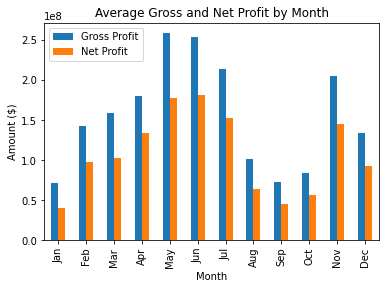

In [91]:
ax = month_grouped.plot(kind='bar', y=['worldwide_gross','worldwide_net']);
ax.set_title('Average Gross and Net Profit by Month');
ax.legend(['Gross Profit', 'Net Profit'], loc=2);
ax.set_xlabel('Month');
ax.set_ylabel('Amount ($)');

## Production Budget
Production budget is most strongly correlated with profits and has a weaker positive correlation with movie ratings. There is no correlation between a movie's budget and its return on investment.

In [92]:
#production budget correlation with net profit, roi and ratings
budget_net_corr = movie_df.production_budget.corr(movie_df.worldwide_net)
print("Production Budget Correlation with Net Profit: ", budget_net_corr)

budget_roi_corr = movie_df.production_budget.corr(movie_df.ROI)
print("Production Budget Correlation with ROI: ", budget_roi_corr)

budget_ratings_corr = movie_df.production_budget.corr(movie_df.averagerating)
print("Production Budget Correlation with Ratings: ", budget_ratings_corr)


Production Budget Correlation with Net Profit:  0.6545158806164486
Production Budget Correlation with ROI:  -0.04410666658309808
Production Budget Correlation with Ratings:  0.24356721920729124


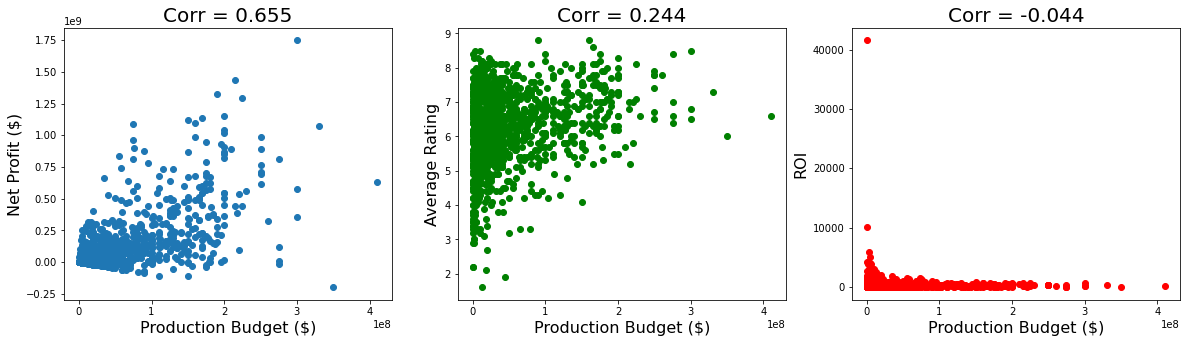

In [93]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

x1 = movie_df.production_budget

y1 = movie_df.worldwide_net
y2 = movie_df.averagerating
y3 = movie_df.ROI

ax1.scatter(x=x1, y=y1);
ax1.set_title('Corr = {}'.format(budget_net_corr.round(3)),fontsize=20 )
ax1.set_xlabel('Production Budget ($)', fontsize=16);
ax1.set_ylabel('Net Profit ($)', fontsize=16);

ax2.scatter(x=x1, y=y2, c='g');
ax2.set_title('Corr = {}'.format(budget_ratings_corr.round(3)),fontsize=20 )
ax2.set_xlabel('Production Budget ($)', fontsize=16);
ax2.set_ylabel('Average Rating', fontsize=16);

ax3.scatter(x=x1, y=y3, c='r');
ax3.set_title('Corr = {}'.format(budget_roi_corr.round(3)),fontsize=20 )
ax3.set_xlabel('Production Budget ($)', fontsize=16);
ax3.set_ylabel('ROI', fontsize=16);

